### WORKING ON THE DATASET FOR THE FIRST TIME
First procedure 



In [1]:
!pip install xgboost


In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import time
import numpy as np
import time
from sklearn.cluster import KMeans
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupKFold, RepeatedKFold, KFold


In [3]:
# Importing machine learning model

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
#importing csv files 

train= pd.read_csv("C:/Users/david/OneDrive/Desktop/Train.csv")
test= pd.read_csv("C:/Users/david/OneDrive/Desktop/Test.csv")
sub= pd.read_csv("C:/Users/david/OneDrive/Desktop/sample_submission.csv")

In [5]:
train_data=train.copy()
test_data=test.copy()

In [6]:
train_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [8]:
train_data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


In [9]:
test_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,NO,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,65.0


In [10]:

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         100000 non-null  object 
 1   REGION          60707 non-null   object 
 2   TENURE          100000 non-null  object 
 3   MONTANT         65049 non-null   float64
 4   FREQUENCE_RECH  65049 non-null   float64
 5   REVENUE         66510 non-null   float64
 6   ARPU_SEGMENT    66510 non-null   float64
 7   FREQUENCE       66510 non-null   float64
 8   DATA_VOLUME     50662 non-null   float64
 9   ON_NET          63617 non-null   float64
 10  ORANGE          58800 non-null   float64
 11  TIGO            40212 non-null   float64
 12  ZONE1           7680 non-null    float64
 13  ZONE2           6422 non-null    float64
 14  MRG             100000 non-null  object 
 15  REGULARITY      100000 non-null  int64  
 16  TOP_PACK        58297 non-null   object 
 17  FREQ_TOP_PA

In [11]:
test_data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
count,65049.000000,65049.000000,66510.000000,66510.000000,66510.000000,50662.000000,63617.000000,58800.000000,40212.000000,7680.000000,6422.000000,100000.000000,58297.000000
mean,5545.613630,11.545051,5518.341663,1839.453676,13.979973,3357.428033,279.370703,94.900799,23.459291,8.373307,7.678138,28.122430,9.276035
std,7123.955226,13.271270,7177.840304,2392.609422,14.655983,10515.256185,870.773904,201.962296,66.932661,40.822161,32.259672,22.324101,12.369808
min,25.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,268.000000,27.000000,28.000000,6.000000,1.000000,2.000000,24.000000,5.000000
75%,7400.000000,16.000000,7399.000000,2466.000000,20.000000,2923.000000,157.000000,99.000000,20.000000,4.000000,5.000000,51.000000,12.000000
max,201500.000000,120.000000,181135.000000,60378.000000,91.000000,474262.000000,24887.000000,5695.000000,3083.000000,1366.000000,1017.000000,62.000000,390.000000


In [12]:
# Checking for Missing Values

print("Missing values in training data:")
print(train_data.isnull().sum())
print("\nMissing values in test data:")
print(test_data.isnull().sum())

Missing values in training data:
user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

Missing values in test data:
user_id               0
REGION            39293
TENURE                0
MONTANT           34951
FREQUENCE_RECH    34951
REVENUE           33490
ARPU_SEGMENT      33490
FREQUENCE         33490
DATA_VOLUME       49338
ON_NET            36383
ORANGE            41200
TIGO              59788
ZONE1             92320
ZONE2             93578
MRG                   0
REGULARITY            0
TOP_PACK          41703
FREQ_TOP_PACK     41703
dtype: int64


In [13]:
# Drop rows with missing values
train_box=train_data.fillna(0)


In [14]:
test_box=test_data.fillna(0)

In [15]:
train_box.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.00000
mean,3586.106717,7.469460,3652.024013,1217.344703,9.254845,1711.384910,175.332520,55.811053,9.289355,0.623840,0.458405,28.046502,5.382965,0.18711
std,6298.734328,12.023612,6397.326965,2132.439701,13.653594,8913.274952,708.935932,163.414673,41.538320,10.255175,7.032521,22.282773,10.436487,0.39000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000
50%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.00000
75%,4600.000000,10.000000,4698.000000,1566.000000,13.000000,301.000000,55.000000,41.000000,3.000000,0.000000,0.000000,51.000000,6.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


In [16]:
train_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          400000 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         400000 non-null  float64
 4   FREQUENCE_RECH  400000 non-null  float64
 5   REVENUE         400000 non-null  float64
 6   ARPU_SEGMENT    400000 non-null  float64
 7   FREQUENCE       400000 non-null  float64
 8   DATA_VOLUME     400000 non-null  float64
 9   ON_NET          400000 non-null  float64
 10  ORANGE          400000 non-null  float64
 11  TIGO            400000 non-null  float64
 12  ZONE1           400000 non-null  float64
 13  ZONE2           400000 non-null  float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        400000 non-null  object 
 17  FREQ_TOP_P

In [17]:
test_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         100000 non-null  object 
 1   REGION          100000 non-null  object 
 2   TENURE          100000 non-null  object 
 3   MONTANT         100000 non-null  float64
 4   FREQUENCE_RECH  100000 non-null  float64
 5   REVENUE         100000 non-null  float64
 6   ARPU_SEGMENT    100000 non-null  float64
 7   FREQUENCE       100000 non-null  float64
 8   DATA_VOLUME     100000 non-null  float64
 9   ON_NET          100000 non-null  float64
 10  ORANGE          100000 non-null  float64
 11  TIGO            100000 non-null  float64
 12  ZONE1           100000 non-null  float64
 13  ZONE2           100000 non-null  float64
 14  MRG             100000 non-null  object 
 15  REGULARITY      100000 non-null  int64  
 16  TOP_PACK        100000 non-null  object 
 17  FREQ_TOP_PA

In [18]:
test_box.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3607.36621,7.509940,3670.249040,1223.420640,9.298080,1700.940190,177.727260,55.80167,9.433450,0.643070,0.493090,28.122430,5.407650
std,6324.92754,12.036267,6407.006547,2135.667098,13.652632,7670.355478,707.415259,161.75737,43.974727,11.529918,8.388448,22.324101,10.493804
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1000.00000,2.000000,1000.000000,333.000000,3.000000,0.000000,3.000000,3.00000,0.000000,0.000000,0.000000,24.000000,1.000000
75%,4600.00000,10.000000,4767.000000,1589.250000,13.000000,296.000000,56.000000,41.00000,3.000000,0.000000,0.000000,51.000000,6.000000
max,201500.00000,120.000000,181135.000000,60378.000000,91.000000,474262.000000,24887.000000,5695.00000,3083.000000,1366.000000,1017.000000,62.000000,390.000000


In [19]:
sub.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0
1,5335efd940280b82143272275637d1e65d37eadb,0
2,a581f4fa08677c26f83f643248c667e241043086,0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0


## Target distribution


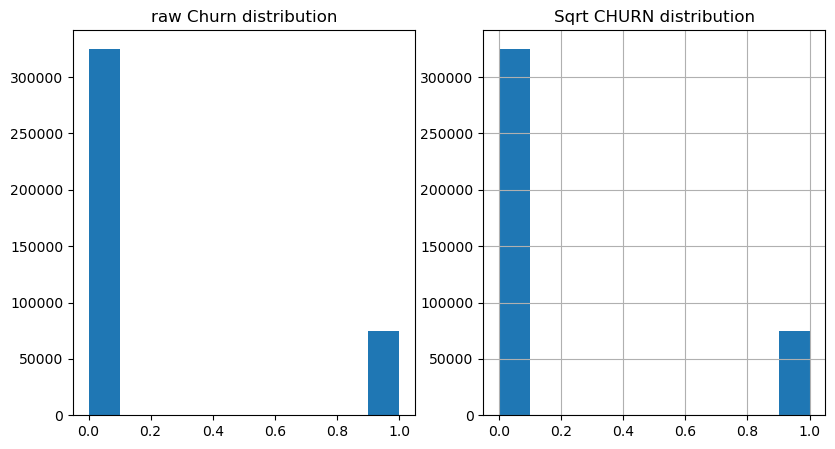

In [20]:
sns.style=('darkgrid')
plt.figure(figsize=[15,5])


plt.subplot(1,3,1)
plt.title('raw Churn distribution')
plt.hist(data=train_box, x = 'CHURN');



plt.subplot(1,3,2)
plt.title('Sqrt CHURN distribution')
np.sqrt((train_box['CHURN'])).hist();

In [21]:
train_box['CHURN'].describe().round(3)

count    400000.000
mean          0.187
std           0.390
min           0.000
25%           0.000
50%           0.000
75%           0.000
max           1.000
Name: CHURN, dtype: float64

## Feature Engineering

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
train_box.loc[:,'REGION_label'] = label_encoder.fit_transform(train_box['REGION'].astype(str))


test_box.loc[:,'REGION_label'] = label_encoder.fit_transform(test_box['REGION'].astype(str))


In [23]:
train_box.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,REGION_label
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,0.0,97.0,355.0,6.0,0.0,0.0,NO,62,All-net 500F=2000F;5d,35.0,0,10
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,0,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,0.0,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,0.0,30.0,30.0,0.0,0.0,0.0,NO,32,All-net 500F=2000F;5d,3.0,0,12
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,0.0,0.0,NO,18,On net 200F=Unlimited _call24H,3.0,0,3
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,0.0,0.0,498.0,166.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,NO,50,0,0.0,0,3


In [24]:
test_box.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,REGION_label
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0,K > 24 month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,1,0,0.0,0
1,5335efd940280b82143272275637d1e65d37eadb,0,K > 24 month,0.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,2,0,0.0,0
2,a581f4fa08677c26f83f643248c667e241043086,0,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,0.0,7.0,2.0,0.0,0.0,NO,27,"Data: 100 F=40MB,24H",17.0,0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,0.0,0.0,NO,46,IVR Echat_Daily_50F,3.0,1
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,0.0,128.0,555.0,280.0,0.0,0.0,NO,61,All-net 500F=2000F;5d,65.0,1


In [25]:
train_box.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,REGION_label
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.00000,400000.000000
mean,3586.106717,7.469460,3652.024013,1217.344703,9.254845,1711.384910,175.332520,55.811053,9.289355,0.623840,0.458405,28.046502,5.382965,0.18711,3.378662
std,6298.734328,12.023612,6397.326965,2132.439701,13.653594,8913.274952,708.935932,163.414673,41.538320,10.255175,7.032521,22.282773,10.436487,0.39000,4.577397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000
50%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.00000,1.000000
75%,4600.000000,10.000000,4698.000000,1566.000000,13.000000,301.000000,55.000000,41.000000,3.000000,0.000000,0.000000,51.000000,6.000000,0.00000,7.000000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000,14.000000


In [26]:
test_box.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,REGION_label
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3607.36621,7.509940,3670.249040,1223.420640,9.298080,1700.940190,177.727260,55.80167,9.433450,0.643070,0.493090,28.122430,5.407650,3.389270
std,6324.92754,12.036267,6407.006547,2135.667098,13.652632,7670.355478,707.415259,161.75737,43.974727,11.529918,8.388448,22.324101,10.493804,4.582553
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,1000.00000,2.000000,1000.000000,333.000000,3.000000,0.000000,3.000000,3.00000,0.000000,0.000000,0.000000,24.000000,1.000000,1.000000
75%,4600.00000,10.000000,4767.000000,1589.250000,13.000000,296.000000,56.000000,41.00000,3.000000,0.000000,0.000000,51.000000,6.000000,7.000000
max,201500.00000,120.000000,181135.000000,60378.000000,91.000000,474262.000000,24887.000000,5695.00000,3083.000000,1366.000000,1017.000000,62.000000,390.000000,14.000000


In [27]:
#Extracting numbers from strings
import re


In [28]:
# Write a pattern to extract numbers
#Extracting numbers from strings
import re

def return_mileage(length):
    
    # Search the text for matches
    mile = re.search("\d+", length)
    
    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return int(mile.group(0))
        
# Apply the function to the Length column and take a look at both columns
train_box.loc[:,"TENURE_um"] = train_box["TENURE"].apply(return_mileage)

print(train_box[["TENURE", "TENURE_um"]].head())

         TENURE  TENURE_um
0  K > 24 month         24
1  K > 24 month         24
2  K > 24 month         24
3  K > 24 month         24
4  K > 24 month         24


In [29]:
train_box.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,...,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,REGION_label,TENURE_um
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,0.0,97.0,...,6.0,0.0,0.0,NO,62,All-net 500F=2000F;5d,35.0,0,10,24
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,0,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,...,0.0,0.0,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0,0,24
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,0.0,30.0,...,0.0,0.0,0.0,NO,32,All-net 500F=2000F;5d,3.0,0,12,24
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,...,19.0,0.0,0.0,NO,18,On net 200F=Unlimited _call24H,3.0,0,3,24
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,0.0,0.0,498.0,166.0,3.0,1.0,1.0,...,0.0,0.0,0.0,NO,50,0,0.0,0,3,24


### Extracting numerical values

In [30]:
# Write a pattern to extract numbers
def return_mileage(length):
    
    # Search the text for matches
    mile = re.search("\d+", length)
    
    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return int(mile.group(0))
        
# Apply the function to the Length column and take a look at both columns
test_box.loc[:,"TENURE_um"] = test_box["TENURE"].apply(return_mileage)

print(test_box[["TENURE", "TENURE_um"]].head())

         TENURE  TENURE_um
0  K > 24 month         24
1  K > 24 month         24
2  K > 24 month         24
3  K > 24 month         24
4  K > 24 month         24


In [31]:
test_box.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,REGION_label,TENURE_um
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0,K > 24 month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,1,0,0.0,0,24
1,5335efd940280b82143272275637d1e65d37eadb,0,K > 24 month,0.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,2,0,0.0,0,24
2,a581f4fa08677c26f83f643248c667e241043086,0,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,0.0,7.0,2.0,0.0,0.0,NO,27,"Data: 100 F=40MB,24H",17.0,0,24
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,0.0,0.0,NO,46,IVR Echat_Daily_50F,3.0,1,24
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,0.0,128.0,555.0,280.0,0.0,0.0,NO,61,All-net 500F=2000F;5d,65.0,1,24


In [32]:
train_box.loc[:,'MGR_T']=train_box['MRG'].apply(lambda y: 1 if y=="YES" else 0)

In [33]:
test_box.loc[:,'MGR_T']= test_box["MRG"].apply(lambda y:1 if y =="YES" else 0)

In [34]:
trainn_box=train_box.drop(columns=['TOP_PACK'])



In [35]:
testt_box=test_box.drop(columns=['TOP_PACK'])

In [36]:
testt_box.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,FREQ_TOP_PACK,REGION_label,TENURE_um,MGR_T
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0,K > 24 month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,1,0.0,0,24,0
1,5335efd940280b82143272275637d1e65d37eadb,0,K > 24 month,0.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,2,0.0,0,24,0
2,a581f4fa08677c26f83f643248c667e241043086,0,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,0.0,7.0,2.0,0.0,0.0,NO,27,17.0,0,24,0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,0.0,0.0,NO,46,3.0,1,24,0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,0.0,128.0,555.0,280.0,0.0,0.0,NO,61,65.0,1,24,0


In [37]:
train_nn =trainn_box.drop(columns=["user_id","REGION","TENURE","MRG",'MGR_T',"ZONE1","ZONE2"])

In [38]:
train_nn.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN,REGION_label,TENURE_um
0,17000.0,32.0,18000.0,6000.0,34.0,0.0,97.0,355.0,6.0,62,35.0,0,10,24
1,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,22.0,0,0,24
2,1500.0,3.0,1500.0,500.0,3.0,0.0,30.0,30.0,0.0,32,3.0,0,12,24
3,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18,3.0,0,3,24
4,0.0,0.0,498.0,166.0,3.0,1.0,1.0,3.0,0.0,50,0.0,0,3,24


In [39]:
test_nn=testt_box.drop(columns=["user_id","REGION","TENURE","MRG",'MGR_T',"ZONE1","ZONE2"])

# train_nn.head()

In [40]:
train_nn.info

<bound method DataFrame.info of         MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  \
0       17000.0            32.0  18000.0        6000.0       34.0   
1        4300.0            29.0   4427.0        1476.0       37.0   
2        1500.0             3.0   1500.0         500.0        3.0   
3        1500.0             3.0   2497.0         832.0        4.0   
4           0.0             0.0    498.0         166.0        3.0   
...         ...             ...      ...           ...        ...   
399995    700.0             2.0    704.0         235.0        3.0   
399996      0.0             0.0      0.0           0.0        0.0   
399997    700.0             2.0    699.0         233.0        5.0   
399998      0.0             0.0      9.0           3.0        1.0   
399999      0.0             0.0      0.0           0.0        0.0   

        DATA_VOLUME  ON_NET  ORANGE  TIGO  REGULARITY  FREQ_TOP_PACK  CHURN  \
0               0.0    97.0   355.0   6.0          62       

In [41]:
test_nn.info

<bound method DataFrame.info of        MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0          0.0             0.0      0.0           0.0        0.0          0.0   
1          0.0             0.0     10.0           3.0        1.0          0.0   
2       1900.0            15.0   2299.0         766.0       21.0        414.0   
3       3000.0             9.0   2603.0         868.0       14.0        332.0   
4      32000.0            47.0  33000.0       11000.0       47.0          0.0   
...        ...             ...      ...           ...        ...          ...   
99995    200.0             1.0     20.0           7.0        1.0          0.0   
99996   1000.0             1.0    998.0         333.0        4.0          1.0   
99997   1800.0             7.0   1799.0         600.0        9.0         81.0   
99998   2500.0             4.0   2515.0         838.0        4.0          0.0   
99999      0.0             0.0      0.0           0.0        0.0          0.0

MODEL BUILDING

In [42]:
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , log_loss , confusion_matrix

In [43]:
churn = train_nn['CHURN']
train = train_nn.drop('CHURN', axis=1)

In [44]:
# Splitting the training data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(train, churn, test_size=0.2, random_state=42)

In [45]:
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
# Create a new instance of the CatBoostClassifier with the updated parameters
classifier = CatBoostClassifier(
    subsample=1.0,
    learning_rate=0.01,
    l2_leaf_reg=3,
    iterations=999,
    grow_policy='Lossguide',
    depth=6,
    colsample_bylevel=1.0,
    loss_function='Logloss',
    eval_metric='Logloss',
    early_stopping_rounds=100,
    random_seed=42  # Set a random seed for reproducibility
)

# Step 2: Refit the model on the training data
classifier.fit(
    X_train, 
    Y_train, 
    eval_set=(X_val, Y_val),  # Use validation data for early stopping and evaluation
    verbose=100  # Display progress every 100 iterations
)

# Step 3: Predict probabilities for the validation set
y_pred_proba = classifier.predict_proba(X_val)

# Step 4: Compute and print the log loss on the validation set
log_loss_value = log_loss(Y_val, y_pred_proba)
print(f"Log Loss: {log_loss_value}")


0:	learn: 0.6785808	test: 0.6785878	best: 0.6785878 (0)	total: 320ms	remaining: 5m 19s
100:	learn: 0.2858811	test: 0.2881757	best: 0.2881757 (100)	total: 12.5s	remaining: 1m 50s
200:	learn: 0.2593685	test: 0.2628590	best: 0.2628590 (200)	total: 24s	remaining: 1m 35s
300:	learn: 0.2541625	test: 0.2582536	best: 0.2582536 (300)	total: 36.6s	remaining: 1m 24s
400:	learn: 0.2526655	test: 0.2571156	best: 0.2571156 (400)	total: 48.3s	remaining: 1m 12s
500:	learn: 0.2519236	test: 0.2566139	best: 0.2566139 (500)	total: 1m	remaining: 1m
600:	learn: 0.2514926	test: 0.2563754	best: 0.2563754 (600)	total: 1m 13s	remaining: 48.9s
700:	learn: 0.2512021	test: 0.2562540	best: 0.2562540 (700)	total: 1m 26s	remaining: 36.8s
800:	learn: 0.2509478	test: 0.2561587	best: 0.2561587 (800)	total: 1m 34s	remaining: 23.4s
900:	learn: 0.2507006	test: 0.2560767	best: 0.2560767 (900)	total: 1m 42s	remaining: 11.1s
998:	learn: 0.2505104	test: 0.2560194	best: 0.2560194 (998)	total: 1m 49s	remaining: 0us

bestTest = 0.

In [46]:
Y_pred = classifier.predict(X_val)
# Predicting probabilities for log loss calculation
Y_pred_proba = classifier.predict_proba(X_val)[:, 1]
print("Log Loss:", log_loss(Y_val, Y_pred_proba))

Log Loss: 0.256019409719239


In [47]:

print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Classification Report:\n", classification_report(Y_val, Y_pred))

Accuracy: 0.8770625
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     65023
           1       0.68      0.65      0.66     14977

    accuracy                           0.88     80000
   macro avg       0.80      0.79      0.79     80000
weighted avg       0.88      0.88      0.88     80000



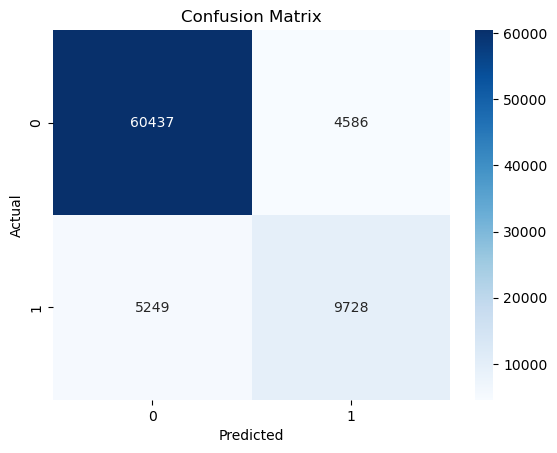

In [48]:
# Confusion matrix
cm = confusion_matrix(Y_val, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

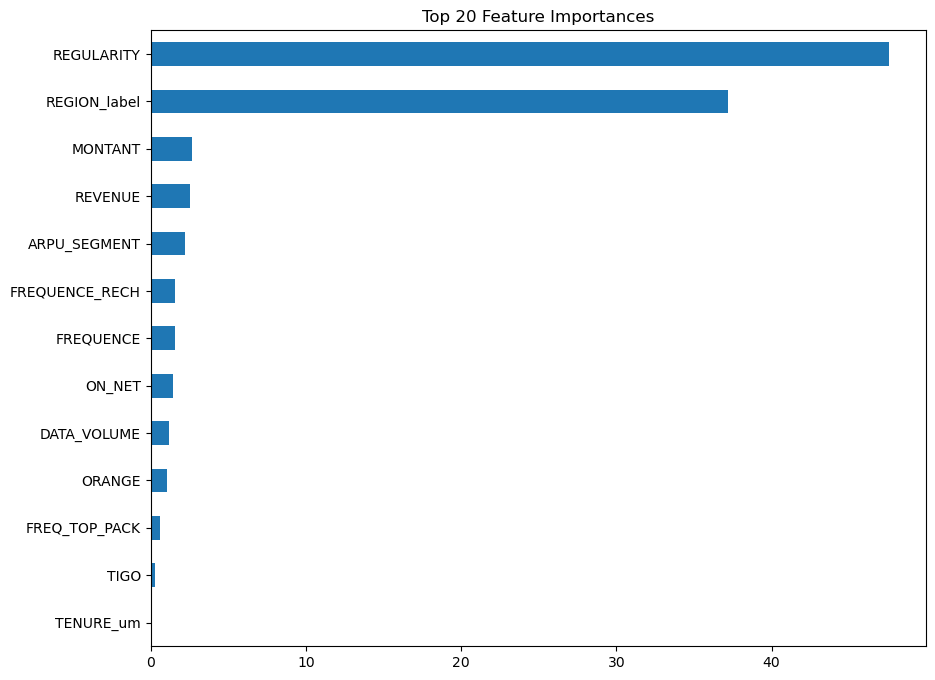

In [49]:
# Get the feature importances from the classifier
feature_importances = pd.Series(classifier.feature_importances_, index=X_train.columns)

# Sort the feature importances and select the top 20
top_20_features = feature_importances.sort_values(ascending=False).head(20)

# Plot the top 20 feature importances
top_20_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 20 Feature Importances')
plt.show()

In [50]:
## Making Predictions on Test Data
# Finally, we use the trained model to make predictions on the test set and prepare the submission file.
predictions = classifier.predict_proba(test_nn)[:, 1]
baseline_sub =sub.copy()
baseline_sub['CHURN'] = predictions
baseline_sub.to_csv('baseline_submission_catboost_expresso.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.780242
1,5335efd940280b82143272275637d1e65d37eadb,0.658478
2,a581f4fa08677c26f83f643248c667e241043086,0.120275
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.003722
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.000378
